Assignment 2
2.1 Linear Regression with Scikit-learn on Linnerud dataset

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


In [4]:
from sklearn.datasets import load_linnerud

X, y = load_linnerud(return_X_y=True)

In [5]:
df1 = pd.DataFrame(X, columns=["weight", "waist", "pulse"])
print(df1)

    weight  waist  pulse
0      5.0  162.0   60.0
1      2.0  110.0   60.0
2     12.0  101.0  101.0
3     12.0  105.0   37.0
4     13.0  155.0   58.0
5      4.0  101.0   42.0
6      8.0  101.0   38.0
7      6.0  125.0   40.0
8     15.0  200.0   40.0
9     17.0  251.0  250.0
10    17.0  120.0   38.0
11    13.0  210.0  115.0
12    14.0  215.0  105.0
13     1.0   50.0   50.0
14     6.0   70.0   31.0
15    12.0  210.0  120.0
16     4.0   60.0   25.0
17    11.0  230.0   80.0
18    15.0  225.0   73.0
19     2.0  110.0   43.0


In [6]:
df2 = pd.DataFrame(y, columns=["chins", "sit_ups", "jumps"])
print(df2)

    chins  sit_ups  jumps
0   191.0     36.0   50.0
1   189.0     37.0   52.0
2   193.0     38.0   58.0
3   162.0     35.0   62.0
4   189.0     35.0   46.0
5   182.0     36.0   56.0
6   211.0     38.0   56.0
7   167.0     34.0   60.0
8   176.0     31.0   74.0
9   154.0     33.0   56.0
10  169.0     34.0   50.0
11  166.0     33.0   52.0
12  154.0     34.0   64.0
13  247.0     46.0   50.0
14  193.0     36.0   46.0
15  202.0     37.0   62.0
16  176.0     37.0   54.0
17  157.0     32.0   52.0
18  156.0     33.0   54.0
19  138.0     33.0   68.0


In [7]:
df = pd.merge(df1, df2, left_index=True, right_index=True)
df

,weight,waist,pulse,chins,sit_ups,jumps
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


Mean error: 20.9 (23.5%)


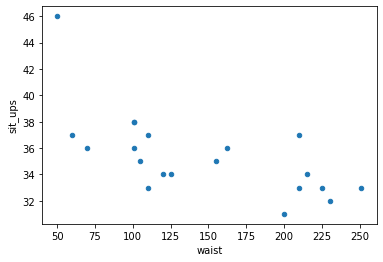

In [8]:
df.plot.scatter(x="waist", y="sit_ups")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

In [9]:
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 20.1 (22.0%)


The mean error was improved when using polynomial regression from 23.5% to 22.0% 

2.2 Logistic Regression 

In the lesson, you used a subset of the pumpkin data. Now, go back to the original data and try to use all of it, cleaned and standardized, to build a Logistic Regression model in a Jupyter notebook. Evaluate your model by a confusion matrix: remember to calculate and visualize the ROC curve. Aim for a well-explained and well-performing model in your notebook.

In [33]:
pumpkins = pd.read_csv('A:/Documents/School/Project401/ML-For-Beginners/2-Regression/data/US-pumpkins.csv')

# clean data
new_columns = ['Color','Origin','Item Size','Variety','City Name','Package', 'Low Price','High Price']

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

# standardize data
pumpkins.columns = pumpkins.columns.str.lower().str.replace(' ', '_')

new_pumpkins.head()

,City Name,Package,Variety,Low Price,High Price,Origin,Item Size,Color
2,1,3,4,29,26,3,3,0
3,1,3,4,29,26,17,3,0
4,1,3,4,16,14,5,2,0
5,1,3,4,16,14,5,2,0
6,1,4,4,29,28,5,3,0


In [34]:
selected_features = ['Origin','Item Size','Variety','City Name','Package']

X = new_pumpkins[selected_features]
y = new_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))



              precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

Predicted labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accuracy:  0.8140703517587939


In [35]:
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 33,   0]], dtype=int64)

c:\Users\G4M3R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\G4M3R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

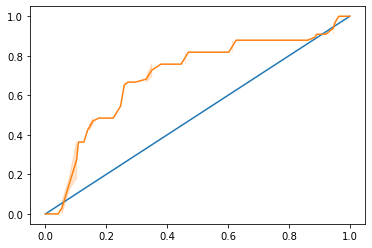

In [36]:
y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
sns.lineplot([0, 1], [0, 1])
sns.lineplot(fpr, tpr)

### 2.3 Digit Classification with Artificial Neural Networks


Part A shows you how to perform a binary classification with Perceptrons using your own framework. Using Scikit-learn on a jupyter notebook, can you train a Multilayer Perceptron on MNIST dataset for 10-digit classification? What are the performance metrics of your model? How could you improve the model performance?

In [37]:
import warnings
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

In [38]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)
X = X/255.0

In [39]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [43]:
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=25,
    alpha=1e-4,
    solver="sgd",
    verbose=True,
    random_state=1,
    learning_rate_init=0.1
)

In [44]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355
Iteration 11, loss = 0.04082169
Iteration 12, loss = 0.03828222
Iteration 13, loss = 0.03557957
Iteration 14, loss = 0.03054891
Iteration 15, loss = 0.02924761
Iteration 16, loss = 0.02610471
Iteration 17, loss = 0.02363894
Iteration 18, loss = 0.02208186
Iteration 19, loss = 0.01932900
Iteration 20, loss = 0.01830387
Iteration 21, loss = 0.01639227
Iteration 22, loss = 0.01392950
Iteration 23, loss = 0.01270193
Iteration 24, loss = 0.01234102
Iteration 25, loss = 0.01081313


In [45]:
print(f"Training set score: {mlp.score(X_train, y_train)}")
print(f"Test set score: {mlp.score(X_test, y_test)}")

Training set score: 0.9973166666666666
Test set score: 0.9725
